In [3]:
import matplotlib.pyplot as plt
import shapely.wkt
from shapely.geometry import Polygon
# https://shapely.readthedocs.io/en/stable/manual.html

multipolygons = ["POLYGON ((72294.5188 6593166.2807, 72258.3237 6593169.6674, 72209.6403 6593170.9374, 72159.4752 6593171.7841, 72121.3751 6593174.9591, 72107.6167 6593176.6524, 72097.6684 6593177.2874, 72126.4551 6593228.2992, 72175.9852 6593232.1092, 72221.282 6593236.1309, 72247.317 6593237.8242, 72255.9954 6593237.8242, 72327.9622 6593229.1459, 72294.5188 6593166.2807))",
                 "POLYGON ((72022.8821 6593043.623, 71993.3461 6592963.5351, 71935.8646 6592991.4806, 71937.9094 6592996.3654, 71946.543 6593007.6118, 71972.3302 6593068.7285, 72022.8821 6593043.623))",
                 "POLYGON ((72372.1782 6593303.4059, 72395.5145 6593292.214, 72399.8802 6593284.2765, 72407.7383 6593254.7489, 72413.2946 6593240.6995, 72420.0414 6593233.1589, 72440.4409 6593225.4595, 72399.5097 6593119.6524, 72370.4055 6593131.8233, 72346.8576 6593141.6129, 72302.9366 6593159.6046, 72372.1782 6593303.4059))",
                 "POLYGON ((72213.2506 6593115.3556, 72226.2682 6593113.9268, 72223.2519 6593091.7018, 72209.7581 6593093.2893, 72213.2506 6593115.3556))"]

In [4]:
def show(polygon, title=None):

    fig, ax = plt.subplots()

    x, y = polygon.exterior.xy
    ax.plot(x, y, color='blue')

    for interior in polygon.interiors:
        x, y = interior.xy
        ax.plot(x, y, color='black')

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    if title:
        ax.set_title('Multipolygon Visualization')
    plt.show()

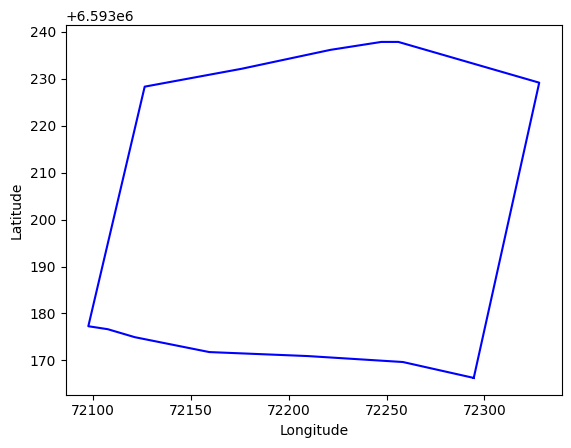

In [6]:
a_str = multipolygons[0]
a = shapely.wkt.loads(a_str)
show(a)

In [9]:
from deep_geometry import vectorizer as gv
print(a_str.count(","))
print(gv.vectorize_wkt(a_str).shape)

13
(14, 7)


In [20]:
from deep_geometry import GeomScaler
import numpy as np
gs = GeomScaler()  # simply initialize
geoms = [gv.vectorize_wkt(one) for one in multipolygons]
dataset = np.stack(geoms, axis=0)
dataset.shape
# gs.fit(dataset)
# gs.scale_factor

ValueError: all input arrays must have the same shape

In [ ]:
# TODO fix polygon vector length variety problem